In [3]:
%pip install pandas
%pip install scikit.learn
%pip install joblib
%pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, mean_absolute_error, r2_score
from sklearn.linear_model import ElasticNet, SGDRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [39]:
df = pd.read_csv('./diamonds.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)

dt = (df.dtypes == "object")
object_cols = list(dt[dt].index)

In [43]:
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])

y = df['price']
X = df.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

column_transformer = ColumnTransformer(
    [('onehot', OneHotEncoder(), object_cols)],
    remainder='passthrough'
)

X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

print(X_train_encoded)

[[0.   1.   0.   ... 8.23 8.19 4.77]
 [0.   0.   0.   ... 6.57 6.49 3.92]
 [0.   0.   0.   ... 6.59 6.54 4.1 ]
 ...
 [0.   0.   0.   ... 4.49 4.46 2.7 ]
 [0.   0.   0.   ... 6.13 6.03 3.82]
 [0.   0.   0.   ... 6.82 6.79 4.11]]


[0.68394352 0.75684512 0.72542898 0.69856735 0.61006218 0.96436778
 0.08609158 0.2756173  0.4667118  0.60979683]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


101.17526485741062
0.9973120202011216


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


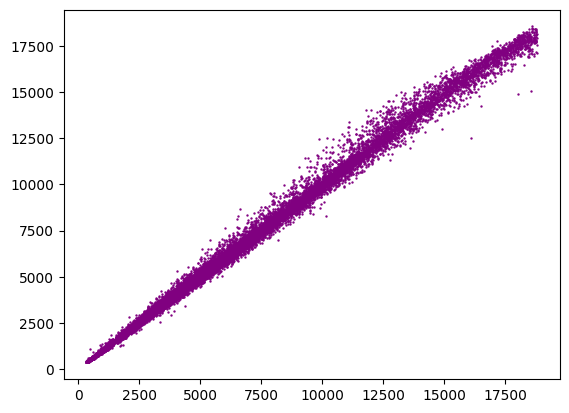

270.2018471950021
0.9809753922281078


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


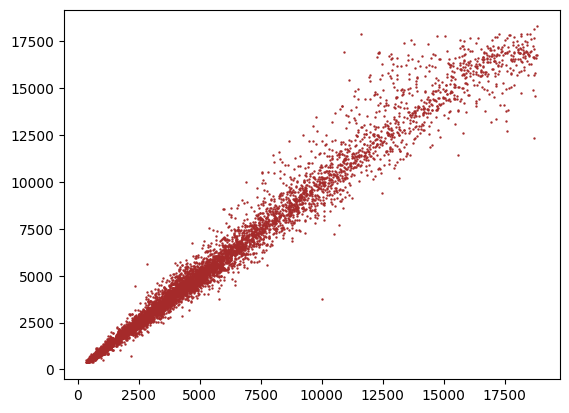

In [44]:
scores = cross_val_score(RandomForestRegressor(n_jobs=-1), X, y, cv = 10)
print(scores)

clf = RandomForestRegressor(verbose=True, n_jobs=-1, random_state=42)

clf.fit(X_train_encoded, y_train)
dump(clf, 'model_random_forest.pkl')

y_pred = clf.predict(X_train_encoded)
print(mean_absolute_error(y_train, y_pred))
print(r2_score(y_train, y_pred))
plt.scatter(y_train, y_pred, s=0.5, c='purple')
plt.show()

y_pred = clf.predict(X_test_encoded)
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, s=0.5, c='brown')
plt.show()

[ -1.53385569  -0.27763646   0.47589924   0.78815932  -0.51317515
   0.76915996 -14.79004658 -10.07390298  -6.33769713  -5.42591674]
Start
Trained
1154.3701992712247


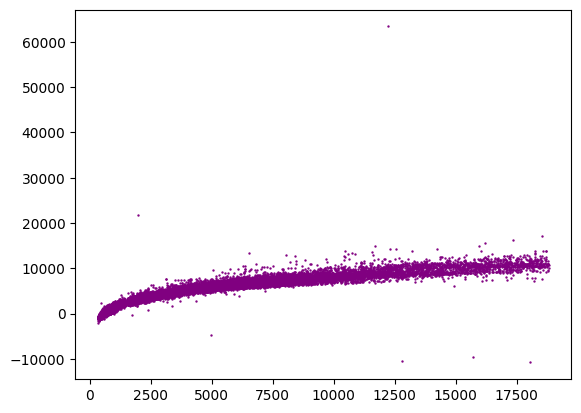

1152.2457086553306


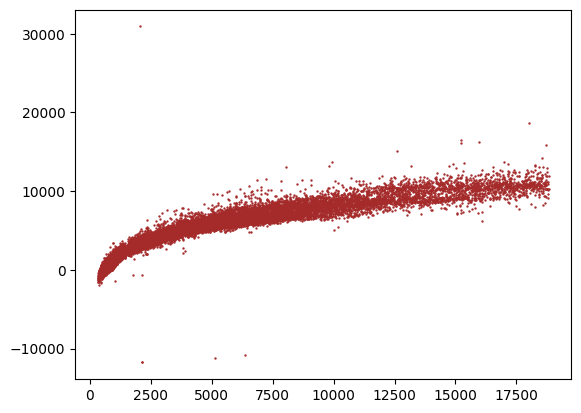

In [14]:
scores = cross_val_score(ElasticNet(), X, y, cv = 10)

print(scores)

# parameters = {
# }
regr = ElasticNet(random_state=42)
# clf = GridSearchCV(
#   regr,
#   parameters,
#   n_jobs = 4,
#   verbose=True
# )
clf = regr

print("Start")
clf.fit(X_train, y_train)
print("Trained")
# print(clf.best_params_)
# clf = clf.best_estimator_
dump(clf, 'model_elastic_net.pkl')

y_pred = clf.predict(X_train)
print(mean_absolute_error(y_train, y_pred))
plt.scatter(y_train, y_pred, s=0.5, c='purple')
plt.show()

y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred, s=0.5, c='brown')
plt.show()

[-8.97592848e+07 -7.73316679e+09 -2.60102425e+09 -4.32428862e+08
 -2.64531276e+07 -5.90625835e+07 -3.54572899e+12 -6.34287093e+09
 -1.56064472e+11 -1.38663850e+09]
Start
Trained
34162311.7607955


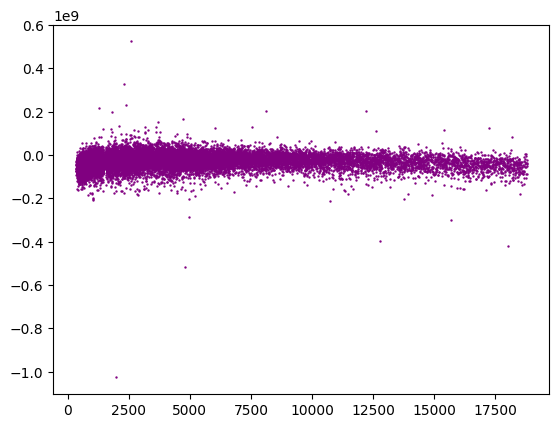

34067693.16679827


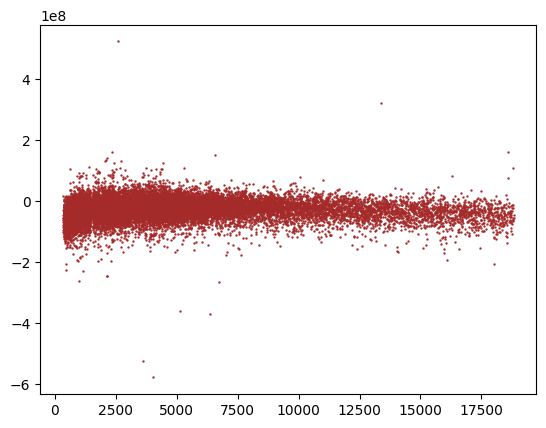

In [12]:
scores = cross_val_score(SGDRegressor(), X, y, cv = 10)

print(scores)

# parameters = {
# }
regr = SGDRegressor(random_state=42)
# clf = GridSearchCV(
#   regr,
#   parameters,
#   n_jobs = 4,
#   verbose=True
# )
clf = regr

print("Start")
clf.fit(X_train, y_train)
print("Trained")
# print(clf.best_params_)
# clf = clf.best_estimator_
dump(clf, 'model_sgd_regressor.pkl')

y_pred = clf.predict(X_train)
print(mean_absolute_error(y_train, y_pred))
plt.scatter(y_train, y_pred, s=0.5, c='purple')
plt.show()

y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred, s=0.5, c='brown')
plt.show()